In [127]:
#Import Basic Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

# Import different Machine learning algorithm Libraries
from sklearn.linear_model import LogisticRegression # Logistics Regressor
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier

#Import additional required packages
from sklearn import ensemble
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score

#Ignore Warning messages
import warnings
warnings.filterwarnings("ignore") #Ignore Warning Messages


In [128]:
#loading dataset 
titanic_data = pd.read_csv('Titanic.csv')

In [129]:
#Checking first 5 rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
#Here, 'Survived' variable is the dependent variable (target variable) and relevant independent variables for model are:
#'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'. 
#We will drop rest irrelevant variables.
titanic_data.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [131]:
#Exploring the data checking data types Not Null values and their count
# There are total 891 Entries with total 12 Columns. In column Cabin and Age there are some missing values
#We need to Preprocess and clean the data 
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [132]:
titanic_data.nunique()  #Checking unique values in a column

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [133]:
titanic_data.describe()# Exploring the data attributes

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
titanic_data.isna().sum()#Checking NA values 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

20-40      385
Missing    177
40-60      128
10-20      115
0-10        64
60+         22
Name: Age_Category, dtype: int64


<AxesSubplot:ylabel='Age_Category'>

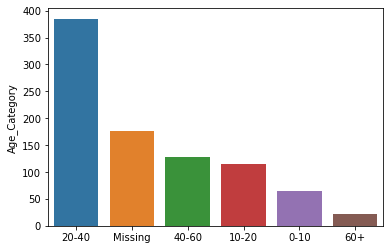

In [135]:
#In the column Age there are 177 missing values we can replace this values by median values which is 28
# Before replacing we will convert this values into age group and see the distribution

titanic_data['Age_Category'] = ''
for i in range(titanic_data.shape[0]):
    ag = titanic_data.Age[i]
    if ag>60:
        titanic_data['Age_Category'][i] = '60+'
    elif ag>40:
        titanic_data['Age_Category'][i] = '40-60'
    elif ag>20:
        titanic_data['Age_Category'][i] = '20-40'
    elif ag>10:
        titanic_data['Age_Category'][i] = '10-20'
    elif ag>0:
        titanic_data['Age_Category'][i] = '0-10'
    else:
        titanic_data['Age_Category'][i] = 'Missing'
age = titanic_data['Age_Category'].value_counts()
print(age)
sns.barplot(age.index, age)

In [136]:
#There are 20% values are missing replacing this value with median value 28
titanic_data['Age'] =  titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data.isna().sum()#Checking NA values 

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
Age_Category    0
dtype: int64

In [137]:
#Replacing 2 missing values with mode values in column Embarked
titanic_data['Embarked'] =  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode())

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:ylabel='Survived'>

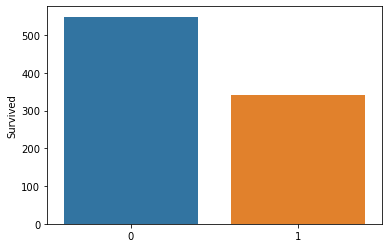

In [138]:
# Distribution of target variable 'Survived' in dataset
survive = titanic_data['Survived'].value_counts()
print(survive)
sns.barplot(survive.index, survive)

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:ylabel='Sex'>

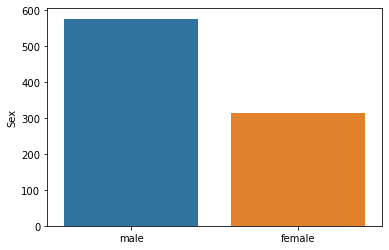

In [139]:
# Distribution of Sex in dataset
sex = titanic_data['Sex'].value_counts()
print(sex)
sns.barplot(sex.index, sex)

Sex       female  male
Survived              
0             81   468
1            233   109


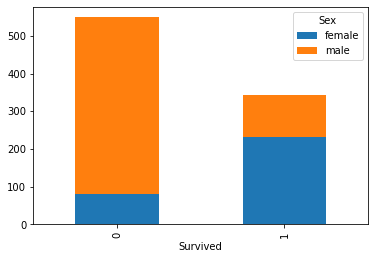

In [140]:
# Survive by Sex in dataset
sex_survive = pd.crosstab(titanic_data.Survived, titanic_data.Sex)
print(sex_survive)

# Creating barplot
barplot = sex_survive.plot.bar(stacked=True)

([<matplotlib.patches.Wedge at 0x1ce781275e0>,
 [Text(-0.5931585979711493, 0.9263708100177275, 'female'),
  Text(0.5931586847042417, -0.9263707544822074, 'male')],
 [Text(-0.32354105343880873, 0.5052931691005785, '68%'),
  Text(0.3235411007477682, -0.5052931388084767, '32%')])

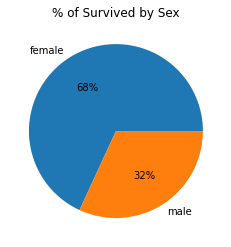

In [141]:
## % Total Survived by Sex in dataset
survive_sex = pd.crosstab(titanic_data.Sex, titanic_data.Survived)
survive_sex.columns = ['Died (Survived = 0)','Survived (Survived = 1)']
survive_sex.reset_index(level=0, inplace = True)
survive_sex["Survival_Rate"] = survive_sex['Survived (Survived = 1)']/(survive_sex['Survived (Survived = 1)'].sum())
x = survive_sex.Sex
y = survive_sex.Survival_Rate
plt.title("% of Survived by Sex")
plt.pie(y, labels = x, autopct='%.0f%%')

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:ylabel='Pclass'>

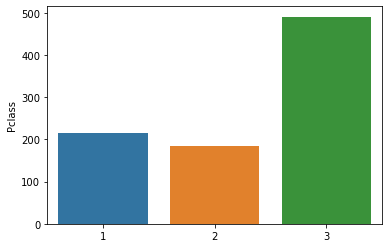

In [142]:
# Distribution of Class in dataset
p_cls = titanic_data['Pclass'].value_counts()
print(p_cls)
sns.barplot(p_cls.index, p_cls)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


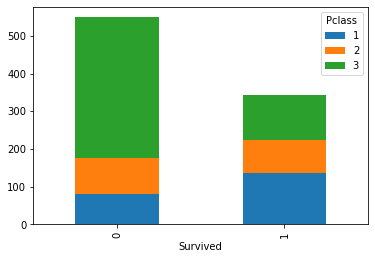

In [143]:
# Survive by Class in dataset
class_survive = pd.crosstab(titanic_data.Survived, titanic_data.Pclass)

print(class_survive)

# Creating barplot
barplot = class_survive.plot.bar(stacked=True)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


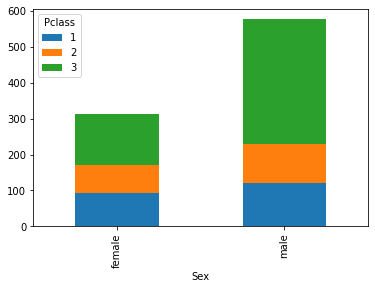

In [144]:
# Sex by Class in dataset
class_sex = pd.crosstab(titanic_data.Sex, titanic_data.Pclass)

print(class_sex)

# Creating barplot
barplot = class_sex.plot.bar(stacked=True)

              Died (Survived = 0)  Alive (Survived = 1)
Age_Category                                           
0-10                           26                    38
10-20                          71                    44
20-40                         232                   153
40-60                          78                    50
60+                            17                     5
Missing                       125                    52


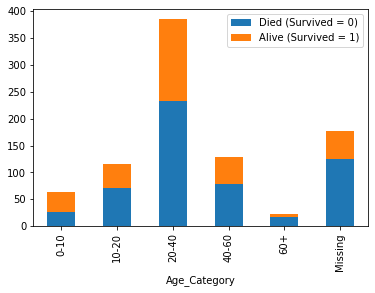

In [145]:
# Survive by age group in dataset
age_survive = pd.crosstab(titanic_data.Age_Category, titanic_data.Survived)
age_survive.columns = ['Died (Survived = 0)', 'Alive (Survived = 1)']
print(age_survive)
# Creating barplot
barplot = age_survive.plot.bar(stacked=True)

Sex           female  male
Age_Category              
0-10              31    33
10-20             46    69
20-40            136   249
40-60             45    83
60+                3    19
Missing           53   124


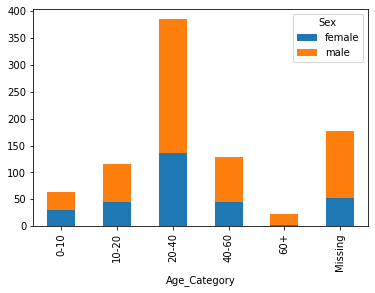

In [146]:
# Sex by age group in train dataset
age_sex = pd.crosstab(titanic_data.Age_Category, titanic_data.Sex)
print(age_sex)
# Creating barplot
barplot = age_sex.plot.bar(stacked=True)

Pclass         1    2    3
Age_Category              
0-10           3   17   44
10-20         18   18   79
20-40         89  104  192
40-60         62   31   35
60+           14    3    5
Missing       30   11  136


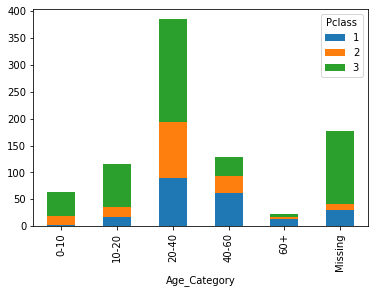

In [147]:
# Class by age group

class_age = pd.crosstab(titanic_data.Age_Category, titanic_data.Pclass)
print(class_age)

# Creating barplot
barplot = class_age.plot.bar(stacked=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:ylabel='Embarked'>

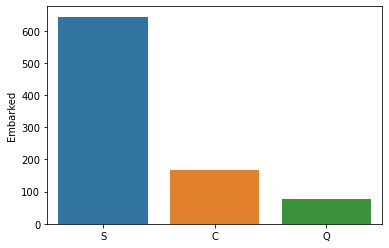

In [148]:
# Distribution of 'Embarked' in train data set

emb = titanic_data['Embarked'].value_counts()
print(emb)
sns.barplot(emb.index, emb)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


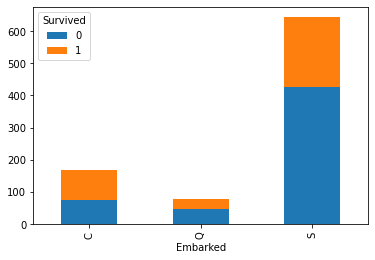

In [149]:
# Survived by Embarked

emb_sur = pd.crosstab(titanic_data.Embarked, titanic_data.Survived)
print(emb_sur)

# Creating barplot
barplot = emb_sur.plot.bar(stacked=True)

<AxesSubplot:>

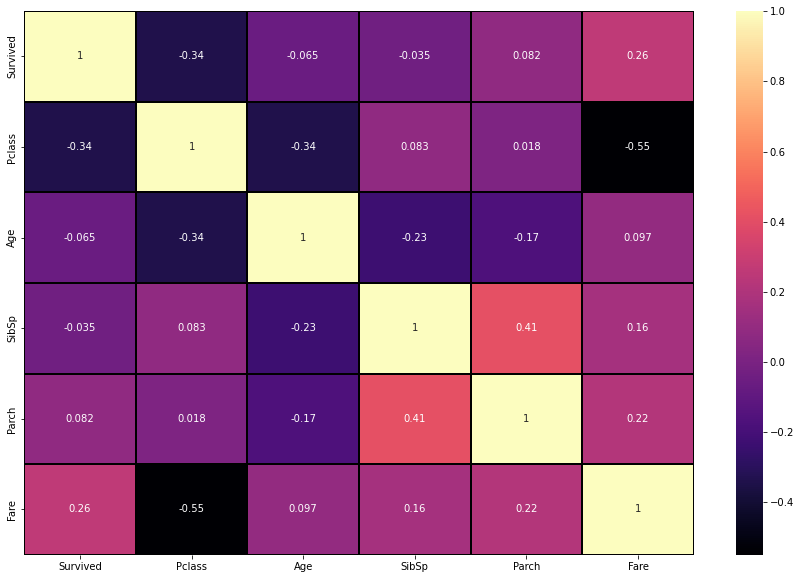

In [150]:
# Heatmap for all correlations (Correlation Plot)

plt.figure(figsize = (15, 10))
sns.heatmap(titanic_data.corr(),cmap='magma',linewidths=2,linecolor='black',annot=True)

In [151]:
# Keeping only relevant columns of data for analysis and prediction

titanic_data = titanic_data.iloc[:,:8] #by position of column of train data
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [152]:
# One hot encoding in dataset
titanic_data = pd.get_dummies(titanic_data, columns = ['Sex', 'Embarked'])
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [153]:
#Spliting Categorical and Numerical Variable of dataset
data_cat = titanic_data[['Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
data_num = titanic_data[['Age', 'SibSp', 'Parch', 'Fare']]
data_col = ['Age', 'SibSp', 'Parch', 'Fare']


# Scaling train dataset
scaler = StandardScaler()
data_num = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_num)
data_num.columns = data_col

In [154]:
# Final train data without Target variable
final_data = data_num.join(data_cat) #joining numerical data after scaling with categorical data
final_data

,Age,SibSp,Parch,Fare,Pclass,Sex_male,Embarked_Q,Embarked_S
0,-0.565736,0.432793,-0.473674,-0.502445,3,1,0,1
1,0.663861,0.432793,-0.473674,0.786845,1,0,0,0
2,-0.258337,-0.474545,-0.473674,-0.488854,3,0,0,1
3,0.433312,0.432793,-0.473674,0.420730,1,0,0,1
4,0.433312,-0.474545,-0.473674,-0.486337,3,1,0,1
...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,2,1,0,1
887,-0.796286,-0.474545,-0.473674,-0.044381,1,0,0,1
888,-0.104637,0.432793,2.008933,-0.176263,3,0,0,1
889,-0.258337,-0.474545,-0.473674,-0.044381,1,1,0,0


In [155]:
# Target Variable
data_target = titanic_data[['Survived']]
data_target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [156]:
# Train Test split of Train dataset for model 
X_train, X_test, y_train, y_test = train_test_split(final_data, data_target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712, 1) (179, 1)


Logistic Regression accuracy: 81.56424581005587%
Confusion Matrix of Logistic Regression =


<AxesSubplot:>

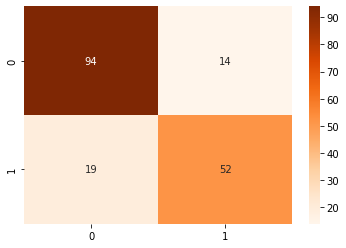

In [157]:
# Logistic Regression for classification
lr = LogisticRegression().fit(X_train, y_train)
prediction_1 = lr.predict(X_test)
lr_accr = accuracy_score(y_test, prediction_1)*100

print('Logistic Regression accuracy: {}%'.format(lr_accr))

# Confusion matrix
print('Confusion Matrix of Logistic Regression =')
sns.heatmap(confusion_matrix(y_test, prediction_1), annot=True,cmap='Oranges',fmt='g')

In [158]:
# Classification Summary of Logistic Regression
print('Classification summary of Logistic Regression =')
print(classification_report(y_test, prediction_1)) 

Classification summary of Logistic Regression =
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       108
           1       0.79      0.73      0.76        71

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



Random Forest Classifier accuracy: 81.00558659217877%
Confusion Matrix of Random Forest =


<AxesSubplot:>

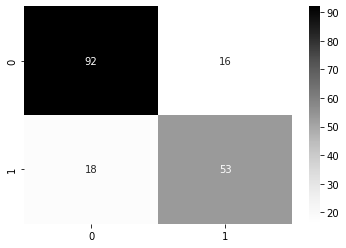

In [159]:
# Random Forest
rf = ensemble.RandomForestClassifier().fit(X_train, y_train)
prediction_3 = rf.predict(X_test)
rf_accr = accuracy_score(y_test, prediction_3)*100

print('Random Forest Classifier accuracy: {}%'.format(rf_accr))

# Confusion matrix
print('Confusion Matrix of Random Forest =')
sns.heatmap(confusion_matrix(y_test, prediction_3), annot=True,cmap='Greys',fmt='g')

Decision Tree Classifier accuracy: 80.44692737430168%
Confusion Matrix of Decision Tree =


<AxesSubplot:>

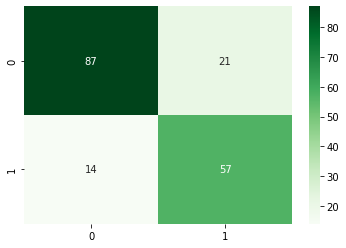

In [160]:
# Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
prediction_2 = dt.predict(X_test)
dt_accr = accuracy_score(y_test, prediction_2)*100

print('Decision Tree Classifier accuracy: {}%'.format(dt_accr))

# Confusion matrix
print('Confusion Matrix of Decision Tree =')
sns.heatmap(confusion_matrix(y_test, prediction_2), annot=True,cmap='Greens',fmt='g')

In [161]:
# Classification Summary of Decision Tree
print('Classification summary of Decision Tree =')
print(classification_report(y_test, prediction_2)) 

Classification summary of Decision Tree =
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       108
           1       0.73      0.80      0.77        71

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

